# Wikipedia Dictionary Research

## In this Jupiter Notebook i will show some Diagrams about the frequency of English words.
### For this project i used a script which extracted around 15.000 Wikipedia pages and summized all words in it.
#### https://www.wikipedia.org/
##### For disclaiming purposes i want to make to understand, that this is not made by a professional researcher and propably not to 100% accurate

## This project was inspired by the statement, that 1000 English words are enough to understand 80% of all sentences. With this project i want to proof it.
#### Articles about this statement:
##### https://www.verbling.com/discussion/how-many-words-should-you-know
##### https://1000mostcommonwords.com/

In [8]:
#import sql magic
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [9]:
#import all libraries
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import pandas as pd

In [10]:
#connect to database
con = sqlite3.connect("ressources/word_frequency.db")
db = con.cursor()

In [20]:
#variables for ploting
frequency = db.execute('SELECT "frequency_in_percent" FROM "word_frequency" ORDER BY "frequency_in_percent" DESC').fetchall()
top_tousand = sum(row[0] for row in frequency[0:1001])
top_hundret = sum(row[0] for row in frequency[0:101])
top_hundret_to_five_hundret = sum(row[0] for row in frequency[101:501])
top_five_hundret_to_tousand = sum(row[0] for row in frequency[501:1001])
top_tousand_to_two_tousand = sum(row[0] for row in frequency[1001:2001])
leftover = sum(row[0] for row in frequency[2001:])
total = sum(row[0] for row in frequency)

# Showing the total frequency of the top 1000 english words in a circle diagramm.

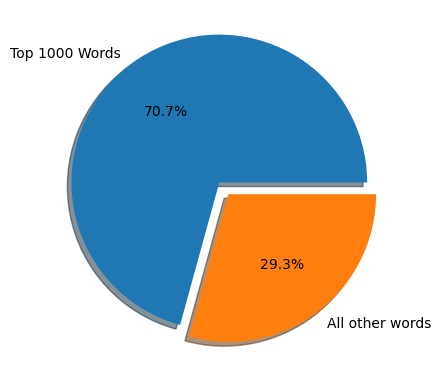

In [21]:
#ploting
labels = 'Top 1000 Words', 'All other words'
sizes = [top_tousand, total-top_tousand]

fig, ax = plt.subplots()
ax.pie(sizes,explode=[0.1,0], labels=labels, autopct='%1.1f%%', shadow=True);

## Considering this diagramm its just 70% instead of 80% which are often praised.

# This plot shows, that the top 100 Words are enough for around 46% of all words

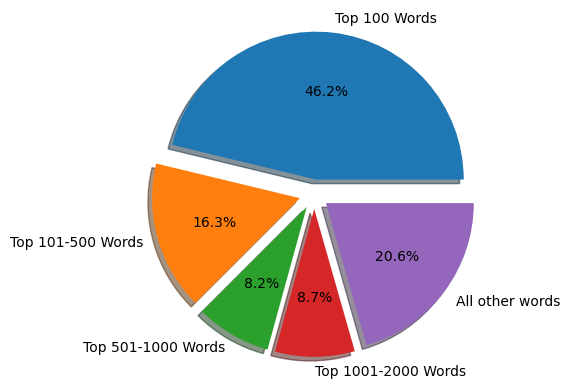

In [22]:
#ploting
frequency = db.execute('SELECT "frequency_in_percent" FROM "word_frequency" ORDER BY "frequency_in_percent" DESC').fetchall()
top_hundret = sum(row[0] for row in frequency[0:101])
top_hundret_to_five_hundret = sum(row[0] for row in frequency[101:501])
top_five_hundret_to_tousand = sum(row[0] for row in frequency[501:1001])
top_tousand_to_two_tousand = sum(row[0] for row in frequency[1001:2001])
leftover = sum(row[0] for row in frequency[2001:])

labels = 'Top 100 Words', 'Top 101-500 Words', 'Top 501-1000 Words', 'Top 1001-2000 Words', 'All other words'
sizes = [top_hundret, top_hundret_to_five_hundret, top_five_hundret_to_tousand, top_tousand_to_two_tousand, leftover]

fig, ax = plt.subplots()
ax.pie(sizes,explode=[0.1, 0.1, 0.1, 0.1, 0.1], labels=labels, autopct='%1.1f%%', shadow=True);